<a href="https://colab.research.google.com/github/A-ryan-ngl/model-cool/blob/main/PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold

### **Data Acquisation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project/dehradun_house_price.csv')

In [ ]:
df.head()

,price,area,bedroom,bathroom,stories,mainroad,guestroom,basement,facing,parking,prefarea,furnishingstatus
0,9495299,427,4,4,3,not connected,yes,yes,west,no,2,not furnished
1,4657356,146,2,1,2,not connected,no,yes,north,no,2,semi-furnished
2,18285022,385,5,3,2,connected,no,yes,north,no,1,furnished
3,3633033,136,2,1,3,not connected,no,no,west,no,3,semi-furnished
4,11320566,343,5,3,1,not connected,no,yes,south,no,2,semi-furnished


In [ ]:
df.tail()

,price,area,bedroom,bathroom,stories,mainroad,guestroom,basement,facing,parking,prefarea,furnishingstatus
1138,3485612,225,4,3,1,connected,no,yes,south,yes,4,semi-furnished
1139,19665687,349,5,2,1,connected,yes,yes,south,yes,1,furnished
1140,3652593,131,2,1,1,not connected,yes,no,east,no,3,semi-furnished
1141,5086089,136,3,1,2,connected,yes,yes,north,no,3,semi-furnished
1142,8978219,274,3,3,3,connected,no,no,north,yes,1,not furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             1143 non-null   int64 
 1   area              1143 non-null   int64 
 2   bedroom           1143 non-null   int64 
 3   bathroom          1143 non-null   int64 
 4   stories           1143 non-null   int64 
 5   mainroad          1143 non-null   object
 6   guestroom         1143 non-null   object
 7   basement          1143 non-null   object
 8   facing            1143 non-null   object
 9   parking           1143 non-null   object
 10  prefarea          1143 non-null   int64 
 11  furnishingstatus  1143 non-null   object
dtypes: int64(6), object(6)
memory usage: 107.3+ KB


In [ ]:
print(df.describe())

              price         area      bedroom     bathroom      stories  \
count  1.143000e+03  1143.000000  1143.000000  1143.000000  1143.000000   
mean   8.216408e+06   286.017498     3.566054     2.259843     1.963255   
std    4.398425e+06   121.707538     1.200103     0.960620     0.838258   
min    2.500000e+06    80.000000     1.000000     1.000000     1.000000   
25%    4.275094e+06   180.000000     3.000000     2.000000     1.000000   
50%    7.262545e+06   281.000000     4.000000     2.000000     2.000000   
75%    1.162447e+07   390.000000     5.000000     3.000000     3.000000   
max    2.307180e+07   499.000000     5.000000     4.000000     3.000000   

          prefarea  
count  1143.000000  
mean      2.499563  
std       1.118915  
min       1.000000  
25%       1.500000  
50%       2.000000  
75%       3.500000  
max       4.000000  


### **Filtering Dataset**

In [ ]:
df.isnull()

,price,area,bedroom,bathroom,stories,mainroad,guestroom,basement,facing,parking,prefarea,furnishingstatus
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,False,False,False,False,False,False,False,False,False,False,False,False
1139,False,False,False,False,False,False,False,False,False,False,False,False
1140,False,False,False,False,False,False,False,False,False,False,False,False
1141,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedroom,0
bathroom,0
stories,0
mainroad,0
guestroom,0
basement,0
facing,0
parking,0


### **Graphing and Plotting**

In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

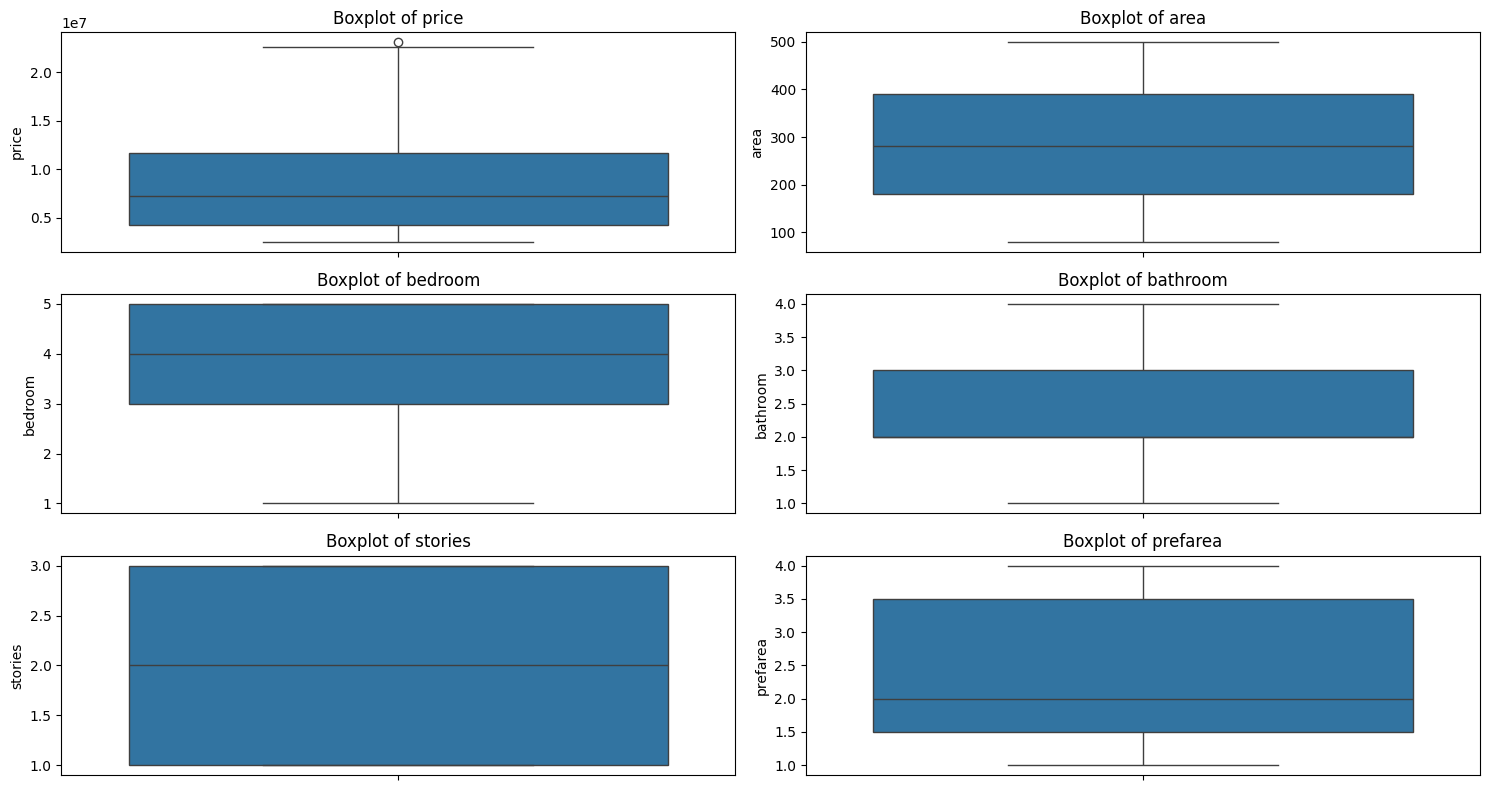

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(3,2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

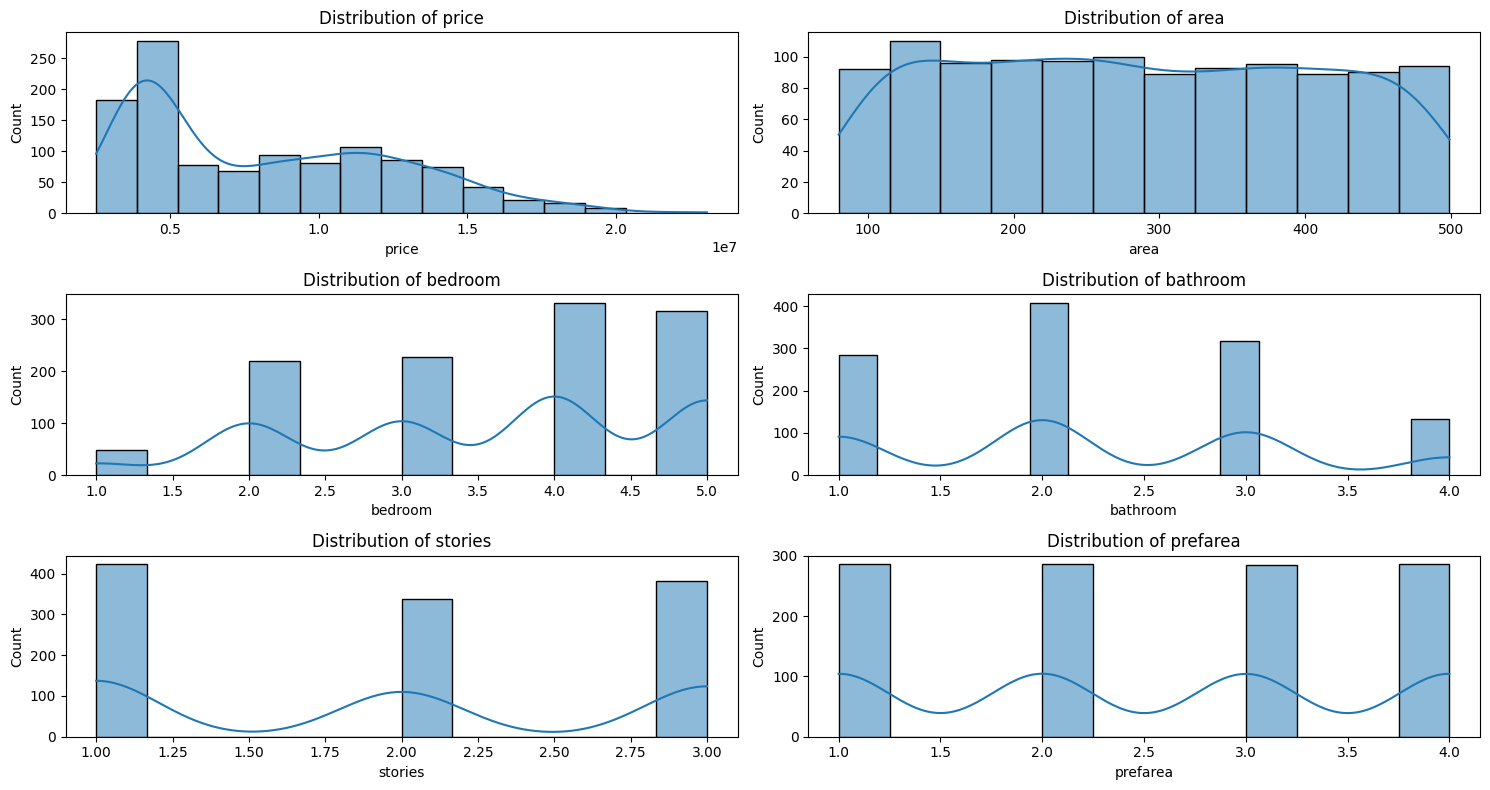

In [ ]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(3,2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

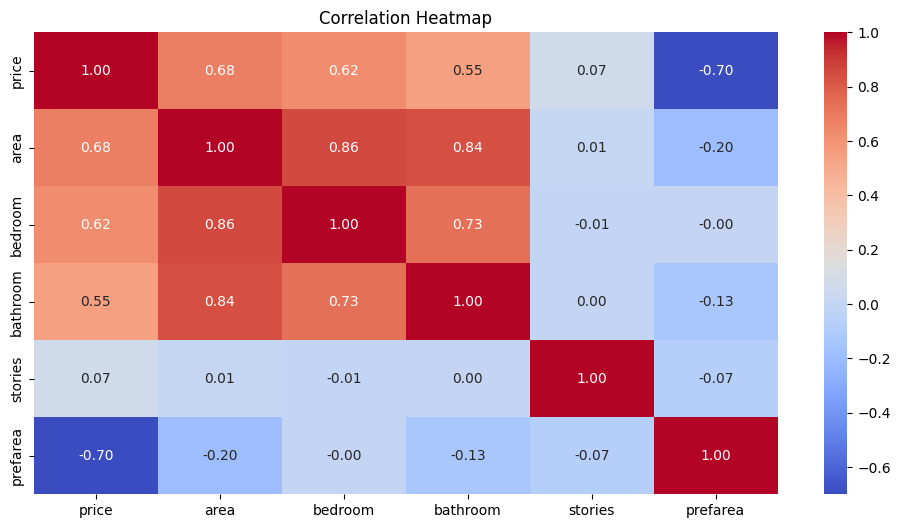

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

###**Data Transformation**

In [ ]:
df.head()

,price,area,bedroom,bathroom,stories,mainroad,guestroom,basement,facing,parking,prefarea,furnishingstatus
0,9495299,427,4,4,3,not connected,yes,yes,west,no,2,not furnished
1,4657356,146,2,1,2,not connected,no,yes,north,no,2,semi-furnished
2,18285022,385,5,3,2,connected,no,yes,north,no,1,furnished
3,3633033,136,2,1,3,not connected,no,no,west,no,3,semi-furnished
4,11320566,343,5,3,1,not connected,no,yes,south,no,2,semi-furnished


In [ ]:
df['mainroad'].unique()

array(['not connected', 'connected'], dtype=object)

In [ ]:
df['mainroad']=df['mainroad'].replace({'connected':0,'not connected':1})

<ipython-input-527-3c1ff994a0b8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['mainroad']=df['mainroad'].replace({'connected':0,'not connected':1})


Now for MainRoad : 'connected' represents '0'
                   'not connected' represents '1'

In [ ]:
df['guestroom'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['guestroom']=df['guestroom'].replace({'no':1,'yes':0})

<ipython-input-529-bb95e05f11cd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['guestroom']=df['guestroom'].replace({'no':1,'yes':0})


Now for GuestRoom : 'yes' represents '0'
                    'no' represents '1'

In [ ]:
df['basement'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['basement']=df['basement'].replace({'no':1,'yes':0})

<ipython-input-531-f54fd5004df5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['basement']=df['basement'].replace({'no':1,'yes':0})


Now for Basement : 'yes' represents '0'
                    'no' represents '1'

In [ ]:
df['facing'].unique()

array(['west', 'north', 'south', 'east'], dtype=object)

In [ ]:
df['facing']=df['facing'].replace({'east':0,'west':1,'north':2,'south':3})

<ipython-input-533-292db30a1e2e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['facing']=df['facing'].replace({'east':0,'west':1,'north':2,'south':3})


Now for Facing : 'east' represents '0'
                 'west' represents '1'
                 'north' represents '2'
                 'south' represents '3'

In [ ]:
df['parking'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['parking']=df['parking'].replace({'no':1,'yes':0})

<ipython-input-535-56b3968f0a97>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['parking']=df['parking'].replace({'no':1,'yes':0})


Now for Parking : 'yes' represents '0'
                    'no' represents '1'

In [ ]:
df['furnishingstatus'].unique()

array(['not furnished', 'semi-furnished', 'furnished'], dtype=object)

In [ ]:
df['furnishingstatus']=df['furnishingstatus'].replace({'furnished':0,'semi-furnished':1,'not furnished':2})

<ipython-input-537-cbe65f0991c7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus']=df['furnishingstatus'].replace({'furnished':0,'semi-furnished':1,'not furnished':2})


Now for Furnishing Status: 'furnished' represents '0'
                    'semi furnished' represents '1'
                    'unfurnished' represents '2'

In [ ]:
df.head()

,price,area,bedroom,bathroom,stories,mainroad,guestroom,basement,facing,parking,prefarea,furnishingstatus
0,9495299,427,4,4,3,1,0,0,1,1,2,2
1,4657356,146,2,1,2,1,1,0,2,1,2,1
2,18285022,385,5,3,2,0,1,0,2,1,1,0
3,3633033,136,2,1,3,1,1,1,1,1,3,1
4,11320566,343,5,3,1,1,1,0,3,1,2,1


### **Seprate Features and Target**

In [ ]:
X = df.drop(['price'], axis=1)
y = df['price']

 Split the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Training the Model

Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

K fold

In [ ]:
kf = KFold(n_splits=8, shuffle=True, random_state=42)

###Accuracy and Scores

Linear Regression

In [ ]:
lr_r2 = r2_score(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)

print("\nLinear Regression Results:")
print(f"R² Score      : {lr_r2:.4f}")
print(f"MSE           : {lr_mse:.4f}")
print(f"RMSE          : {lr_rmse:.4f}")
print(f"Accuracy (R²) : {lr_r2 * 100:.2f}%")


Linear Regression Results:
R² Score      : 0.8776
MSE           : 2141379945392.7190
RMSE          : 1463345.4634
Accuracy (R²) : 87.76%


Random Forest

In [ ]:
rf_r2 = r2_score(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)

print("\nRandom Forest Results:")
print(f"R² Score      : {rf_r2:.4f}")
print(f"MSE           : {rf_mse:.4f}")
print(f"RMSE          : {rf_rmse:.4f}")
print(f"Accuracy (R²) : {rf_r2 * 100:.2f}%")


Random Forest Results:
R² Score      : 0.9229
MSE           : 1349302455380.1802
RMSE          : 1161594.7897
Accuracy (R²) : 92.29%


K Fold Cross Validation

In [ ]:
r2_scores = []
mse_scores = []

In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)

    r2_scores.append(r2_score(y_test, y_pred))
    mse_scores.append(mean_squared_error(y_test, y_pred))

In [ ]:
mean_r2 = np.mean(r2_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.sqrt(mean_mse)

In [ ]:
print("\nLinear Regression K-Fold CV Results:")
print(f"Average R² Score : {mean_r2:.4f}")
print(f"Average MSE      : {mean_mse:.4f}")
print(f"Average RMSE     : {mean_rmse:.4f}")
print(f"Accuracy (R²)    : {mean_r2 * 100:.2f}%")


Linear Regression K-Fold CV Results:
Average R² Score : 0.8811
Average MSE      : 2272593847480.6797
Average RMSE     : 1507512.4701
Accuracy (R²)    : 88.11%


In [ ]:


def predict_price(lr_model, rf_model):
    print("Enter the values for the following features:")

    area = float(input("Area (in sq. m): "))
    bedroom = int(input("Number of bedrooms: "))
    bathroom = int(input("Number of bathrooms: "))
    stories = int(input("Number of stories: "))
    mainroad = input("Is the house on main road? (connected/not connected): ").strip().lower()
    mainroad = 0 if mainroad == 'connected' else 1

    guestroom = input("Guest room? (yes/no): ").strip().lower()
    guestroom = 0 if guestroom == 'yes' else 1

    basement = input("Basement? (yes/no): ").strip().lower()
    basement = 0 if basement == 'yes' else 1

    parking = input("Parking? (yes/no): ").strip().lower()
    parking = 0 if parking == 'yes' else 1

    facing = input("House facing? (east/west/north/south): ").strip().lower()
    facing_map = {'east': 0, 'west': 1, 'north': 2, 'south': 3}
    facing = facing_map.get(facing, 0)

    prefarea = int(input("Preferred area category (as per dataset, e.g., 1, 2): "))

    furnishing = input("Furnishing status? (furnished/semi-furnished/not furnished): ").strip().lower()
    furnishing_map = {'furnished': 0, 'semi-furnished': 1, 'not furnished': 2}
    furnishingstatus = furnishing_map.get(furnishing, 2)

    input_data = pd.DataFrame([[area, bedroom, bathroom, stories, mainroad, guestroom,
                                basement, facing, parking, prefarea, furnishingstatus]],
                              columns=['area', 'bedroom', 'bathroom', 'stories', 'mainroad', 'guestroom',
                                       'basement', 'facing', 'parking', 'prefarea', 'furnishingstatus'])

    pred_lr = lr_model.predict(input_data)[0]
    pred_rf = rf_model.predict(input_data)[0]

    print(f"\nLinear Regression Prediction : {pred_lr:.2f}")
    print(f"Random Forest Prediction     : {pred_rf:.2f}")

# Call the function passing both models
predict_price(lr_model, rf_model)


Enter the values for the following features:
Area (in sq. m): 250
Number of bedrooms: 2
Number of bathrooms: 2
Number of stories: 2
Is the house on main road? (connected/not connected): connected
Guest room? (yes/no): yes
Basement? (yes/no): no
Parking? (yes/no): yes
House facing? (east/west/north/south): east
Preferred area category (as per dataset, e.g., 1, 2): 1
Furnishing status? (furnished/semi-furnished/not furnished): furnished

Linear Regression Prediction : 9509728.20
Random Forest Prediction     : 12180094.81
